In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('train.csv')
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [3]:
X = df['Text']
y = df['Category']

In [4]:
print(X.sample())
print(y.sample())

674    research fears over kelly s views scientists h...
Name: Text, dtype: object
278    business
Name: Category, dtype: object


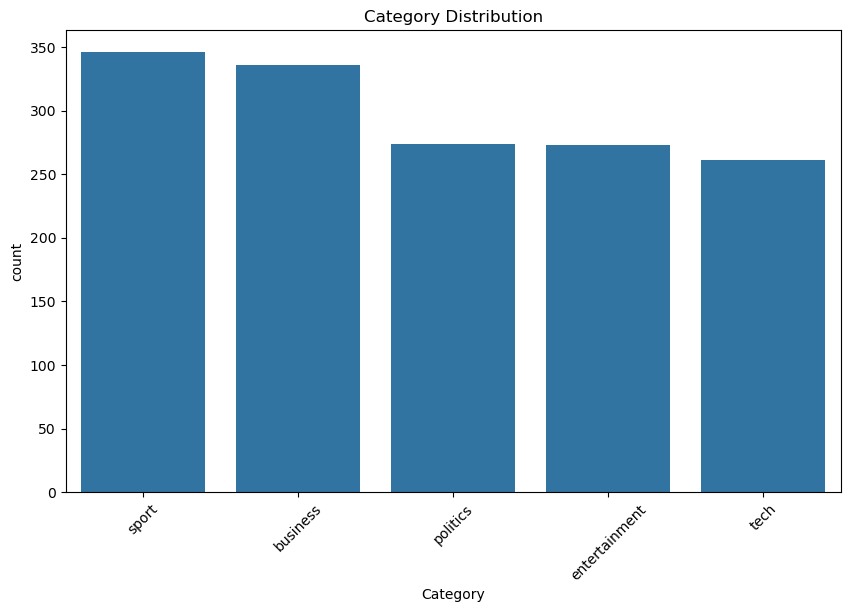

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.xticks(rotation = 45)
plt.title("Category Distribution")
plt.show()

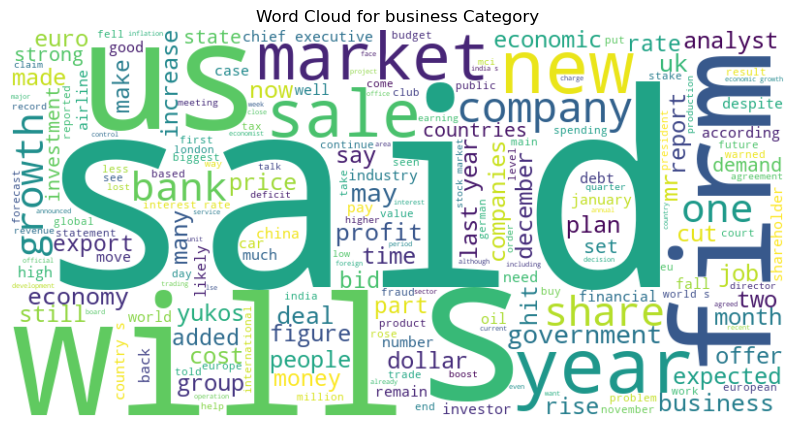

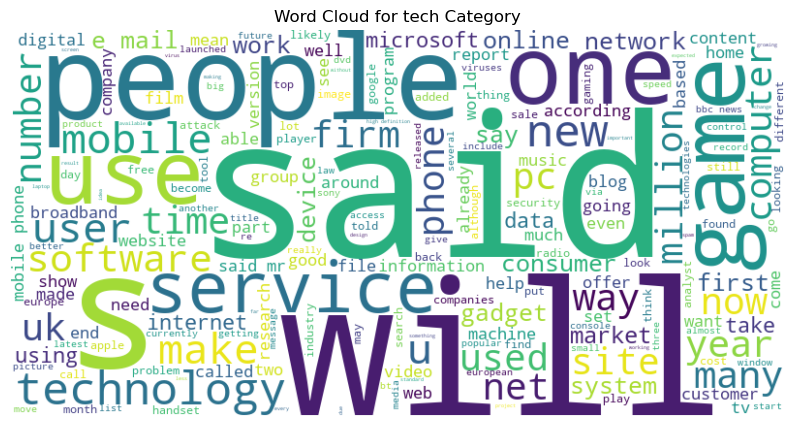

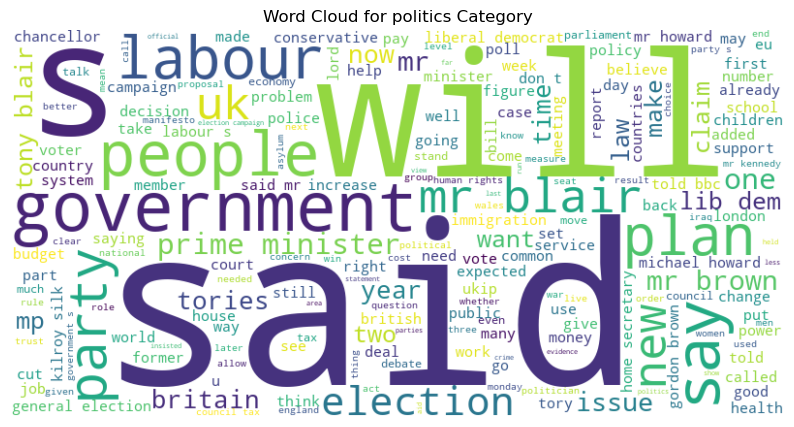

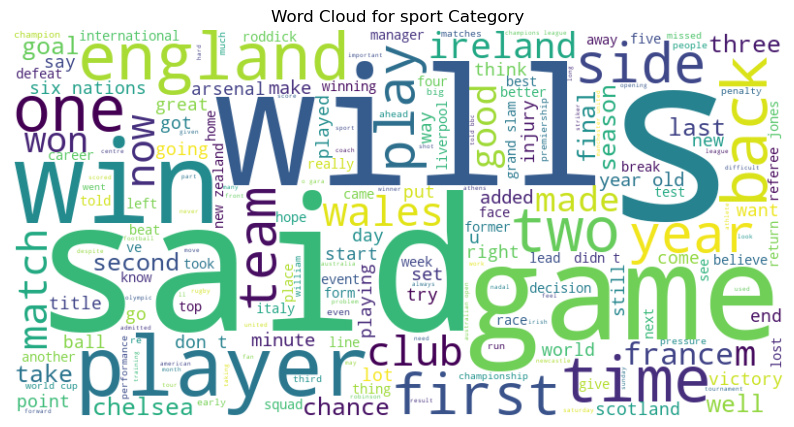

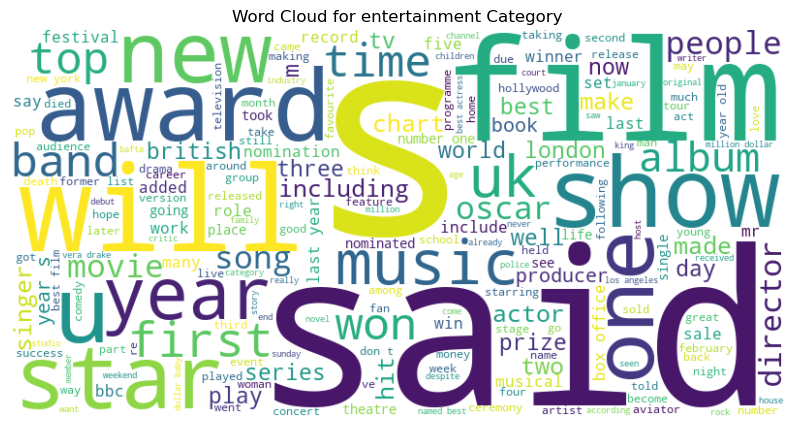

In [ ]:
for category in df['Category'].unique():
    text = " ".join(df[df['Category'] == category]['Text'].values)
    wordCloud = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate(text=text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category} Category')
    plt.axis('off')
    plt.show()

In [14]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /Users/hoatran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/hoatran/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hoatran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [17]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word=word) for word in words if word not in stop_words]
    return ' '.join(words)

In [18]:
print("Hello !! Welcome to my world @@@, 123456!!!")
print(preprocess_text("Hello !! Welcome to my world @@@, 123456!!!"))

Hello !! Welcome to my world @@@, 123456!!!
hello welcome world


In [19]:
df['Text'] = df['Text'].apply(preprocess_text)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
lr_model = make_pipeline(TfidfVectorizer(stop_words='english'), LogisticRegression())
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [22]:
print("Accuracy =" , accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred=y_pred_lr))

Accuracy = 0.9664429530201343
               precision    recall  f1-score   support

     business       0.92      0.97      0.95        75
entertainment       1.00      1.00      1.00        46
     politics       0.96      0.95      0.95        56
        sport       0.98      1.00      0.99        63
         tech       0.98      0.91      0.95        58

     accuracy                           0.97       298
    macro avg       0.97      0.97      0.97       298
 weighted avg       0.97      0.97      0.97       298



In [26]:
new_texts = [
    'Liverpool edged past Chelsea in a thrilling 3-2 encounter at Anfield, securing a crucial Premier League win. Mohamed Salah opened the scoring early, but Chelsea responded through Raheem Sterling. Darwin Núñez restored Liverpool’s lead before Christopher Nkunku equalized again. In the dying minutes, Trent Alexander-Arnold fired a stunning free-kick to seal the victory. The Reds remain in title contention, while Chelsea faces pressure to bounce back. Manager Jürgen Klopp praised his team’s resilience, saying, “We fought until the last second.” Liverpool now prepares for a crucial Champions League clash, hoping to carry forward their winning momentum.',
    'Apple has officially announced the M4 chip, bringing significant AI-focused upgrades to its Mac lineup. Built on a 3nm architecture, the chip promises faster performance, improved efficiency, and enhanced machine learning capabilities. The Neural Engine now processes AI tasks up to 50% faster, optimizing real-time applications like video editing, gaming, and automation. Apple claims the M4 will revolutionize Mac performance, offering better battery life and seamless multitasking. Analysts predict this move strengthens Apple’s push into AI-driven computing. The first devices powered by the M4 chip are expected to launch later this year, setting new industry benchmarks.',
    'Denis Villeneuve’s Dune: Part Two has taken the global box office by storm, earning a massive $200 million in its opening weekend. The sci-fi epic, starring Timothée Chalamet and Zendaya, has captivated audiences with its stunning visuals and intense storytelling. Critics have praised the film’s direction, performances, and breathtaking cinematography. Fans are already calling it one of the best sequels of the decade. Industry experts predict Dune: Part Two could surpass its predecessor’s total earnings, solidifying its place as a modern sci-fi masterpiece. The film continues to dominate theaters worldwide, drawing massive crowds.',
    'Lionel Messi dazzled in Inter Miami’s season opener, scoring twice in a thrilling 3-1 win. The Argentine superstar showcased his signature brilliance, delighting fans and keeping Miami at the top of the standings.'
]

new_predicitions = lr_model.predict(new_texts)

for text, prediciton in zip(new_texts, new_predicitions):
    print(f"Text : {text}\nPredicted Catrgory : {prediciton}")

Text : Liverpool edged past Chelsea in a thrilling 3-2 encounter at Anfield, securing a crucial Premier League win. Mohamed Salah opened the scoring early, but Chelsea responded through Raheem Sterling. Darwin Núñez restored Liverpool’s lead before Christopher Nkunku equalized again. In the dying minutes, Trent Alexander-Arnold fired a stunning free-kick to seal the victory. The Reds remain in title contention, while Chelsea faces pressure to bounce back. Manager Jürgen Klopp praised his team’s resilience, saying, “We fought until the last second.” Liverpool now prepares for a crucial Champions League clash, hoping to carry forward their winning momentum.
Predicted Catrgory : sport
Text : Apple has officially announced the M4 chip, bringing significant AI-focused upgrades to its Mac lineup. Built on a 3nm architecture, the chip promises faster performance, improved efficiency, and enhanced machine learning capabilities. The Neural Engine now processes AI tasks up to 50% faster, optimiz

In [28]:
import joblib
joblib.dump(lr_model, 'lr_model.joblib')

['lr_model.joblib']